<a href="https://colab.research.google.com/github/Luciahelenasantos/POS_GRADUACAO_PUC/blob/main/Machine_Learning/MVP_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição do Problema:

(FALAR DA IMPORTÂNCIA DA QUALIDADE DO AR NA SAÚDE)

(FALAR DAS DOENÇAS ORIUNDAS DA QUALIADE DO AR, E COMO ESTAS PODEM SE TORNAR INCURÁVEIS COMO A ASMA, QUE APESAR DE NÃO TER CURA PODE SER CONTROLADA)

(MELHORAR O TEXTO ABAIXO)
A qualidade do ar é medida pelo índice de qualidade do ar (IQA), assim o banco utilizado foi encontrado na plataforma Kaggle, onde nele encontram-se as avaliações dos poluentes Monóxido de Carbono, Ozônio, Dióxido de Nitrogênio e Material Particulado <2.5

(MELHORAR O TEXTO ABAIXO)
O banco possui a variável de avaliação não apenas dos poluentes, mas também da qualidade do ar "AQI Value" medida em muitas cidades no mundo, considerando os poluentes em questão. Assim a proposta seria construir um modelo de classificação a ser treinado, tendo "AQI Value" como target, de forma a possibilitar que o modelo possa vir a ser usado em avaliações de outras cidades.









## Dicionário de dados:

#### *Poluentes considerados na avaliação do índice de qualidade do ar (IQA)*

##### - **NO2:** Dióxido de Nitrogênio medido em Micrograma por Metro Cúbico (µg/m3)
##### - **CO:** Monóxido de Carbono medido em partes por milhão (ppm)
##### - **NO:** Monóxido de Nitrogênio medido em Micrograma por Metro Cúbico (µg/m3)
##### - **O3:** Ozônio medido Micrograma por Metro Cúbico (µg/m3)
##### - **PM2.5:** Material Particulado <2_5 Micrograma por Metro Cúbico (µg/m3)

---

#### *Variáveis Classificadores da Qualidade do AR*

##### - **NO2 AQI Category:**
##### - **CO AQI Category:**
##### - **NO2 AQI Category:**
##### - **Ozone AQI Category**
##### - **PM2.5 AQI Category**

---

#### *Variáveis Medidoras da Qualidade do AR*

##### - **NO2 AQI Value:**
##### - **CO AQI Value:**
##### - **NO2 AQI Value:**
##### - **Ozone AQI Value:**
##### - **PM2.5 AQI Value:**

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset?select=global+air+pollution+dataset.csv


## Importando bibliotecas

In [ ]:
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # biblioteca para criação de gráficos dinâmicos
import plotly.express as px # biblioteca para criação de gráficos dinâmicos
import seaborn as sns # biblioteca para criação de gráficos
import missingno as msno # para tratamento de valores faltantes "missing"
import missingno as ms # para tratamento de valores faltantes "missing"

from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada

from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.preprocessing import StandardScaler # biblioteca para padronização
from sklearn.model_selection import StratifiedKFold # biblioteca para a separação de treino e teste

# ***1 - Carregando o Banco de dados***

In [ ]:
# Importando o arquivo em formato csv hospedado em My Drive

dados_vazios = [ " " ]

QualidadeAR = pd.read_csv("https://raw.githubusercontent.com/Luciahelenasantos/POS_GRADUACAO_PUC/main/Machine_Learning/global_air_pollution_dataset.csv", na_values = dados_vazios)

## 1.1 - Conhecendo o banco de dados QualidadeAR

In [ ]:
# Mostra a estrutura do banco QualidadeAR

QualidadeAR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [ ]:
# Mostrando se existem e, caso positivo, o total de valores Missing e quais variáveis

QualidadeAR.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [ ]:
#  Mostrar apenas a linha onde a variável City possui o valor Missing

QualidadeAR[QualidadeAR['City'].isnull()]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
2641,Israel,NaN,68,Moderate,1,Good,48,Good,4,Good,68,Moderate


In [ ]:
#  Mostrar apenas a linha onde a variável Country possui valores Missing

QualidadeAR[QualidadeAR['Country'].isnull()]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
535,NaN,Granville,30,Good,1,Good,30,Good,3,Good,25,Good
654,NaN,Kingston Upon Hull,33,Good,1,Good,17,Good,8,Good,33,Good
787,NaN,New Waterford,20,Good,1,Good,18,Good,9,Good,20,Good
801,NaN,Kingstown,163,Unhealthy,0,Good,25,Good,0,Good,163,Unhealthy
906,NaN,Nanakuli,30,Good,0,Good,27,Good,0,Good,30,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
22979,NaN,Kyaikkami,54,Moderate,0,Good,20,Good,0,Good,54,Moderate
23115,NaN,Bima,25,Good,1,Good,25,Good,0,Good,24,Good
23311,NaN,Marapanim,25,Good,1,Good,15,Good,0,Good,25,Good
23345,NaN,Calbuco,36,Good,1,Good,15,Good,3,Good,36,Good


In [ ]:
# Mostrar onde não tenho valores Missing

QualidadeAR[QualidadeAR['Country'].notnull()]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [ ]:
# Mostrar quais linhas (axis=1) possuem valores NaN, qualquer que seja a coluna

QualidadeAR[QualidadeAR.isnull().any(axis=1)]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
535,NaN,Granville,30,Good,1,Good,30,Good,3,Good,25,Good
654,NaN,Kingston Upon Hull,33,Good,1,Good,17,Good,8,Good,33,Good
787,NaN,New Waterford,20,Good,1,Good,18,Good,9,Good,20,Good
801,NaN,Kingstown,163,Unhealthy,0,Good,25,Good,0,Good,163,Unhealthy
906,NaN,Nanakuli,30,Good,0,Good,27,Good,0,Good,30,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
22979,NaN,Kyaikkami,54,Moderate,0,Good,20,Good,0,Good,54,Moderate
23115,NaN,Bima,25,Good,1,Good,25,Good,0,Good,24,Good
23311,NaN,Marapanim,25,Good,1,Good,15,Good,0,Good,25,Good
23345,NaN,Calbuco,36,Good,1,Good,15,Good,3,Good,36,Good


In [ ]:
# Mostrar se existem linhas com mais de um NaN

QualidadeAR[QualidadeAR.isnull().sum(axis=1) > 1]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category


In [ ]:
# Mostrar o banco QualidadeAR em formato tabular

QualidadeAR

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


# ***2 - Análise Exploratória***

In [ ]:
# Mostra o quantitativo das variáveis categóricas

QualidadeAR.describe(include='object')

,Country,City,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
count,23036,23462,23463,23463,23463,23463,23463
unique,175,23462,6,3,5,2,6
top,United States of America,Praskoveya,Good,Good,Good,Good,Good
freq,2872,1,9936,23460,21069,23448,10208


## 2.1 - índice Geral AQI

In [ ]:
# Quantitativo das classificações da qualidade para 'AQI Category'

QualidadeAR['AQI Category'].value_counts()

Good                              9936
Moderate                          9231
Unhealthy                         2227
Unhealthy for Sensitive Groups    1591
Very Unhealthy                     287
Hazardous                          191
Name: AQI Category, dtype: int64

In [ ]:
# Histograma com a distribuição da variável 'AQI Value'

histAQI = px.histogram(QualidadeAR, x='AQI Value', nbins=60)
histAQI.update_layout(width=700,height=400,title_text="AQI Cidades")
histAQI.show()

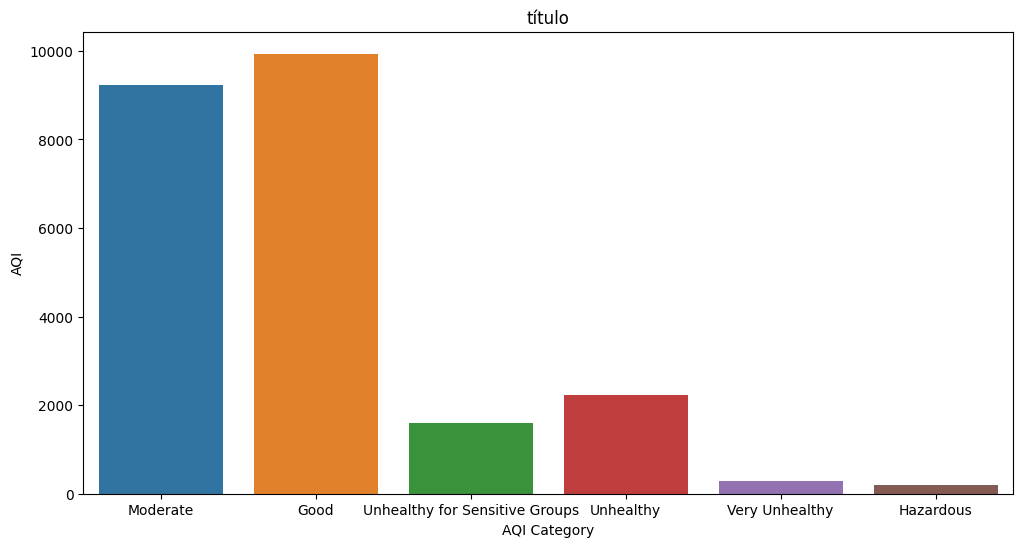

In [ ]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)

fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(x='AQI Category', data=QualidadeAR)
plt.title("título")
plt.ylabel("AQI")
plt.show();

In [ ]:
# Gráfico de setores da variável 'AQI Category'

px.pie(QualidadeAR,'AQI Category')

In [ ]:
# Box-plot com a distribuição da variável 'AQI Value'

boxAQI = px.box(QualidadeAR,y='AQI Value')
boxAQI.update_layout(width=700,height=400,title_text="AQI Cidades")
boxAQI.show()

## 2.2 - *CO*

In [ ]:
# Histograma com a distribuição da variável 'CO AQI Value'

histAQI = px.histogram(QualidadeAR, x='CO AQI Value', nbins=60)
histAQI.update_layout(width=700,height=400,title_text="AQI CO")
histAQI.show()

In [ ]:
# Quantitativo das classificações da qualidade para 'AQI Category'

QualidadeAR['CO AQI Category'].value_counts()

Good                              23460
Moderate                              2
Unhealthy for Sensitive Groups        1
Name: CO AQI Category, dtype: int64

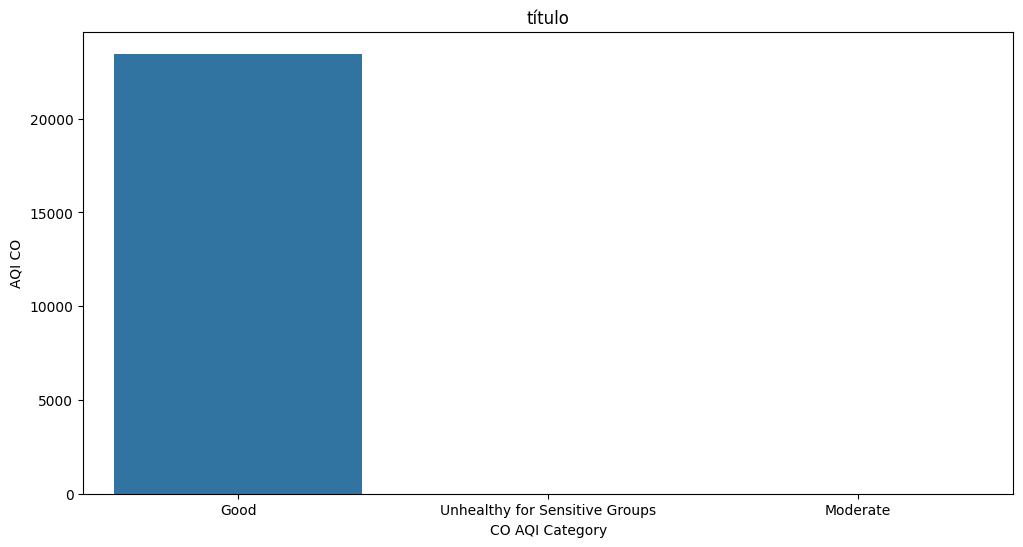

In [ ]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(x='CO AQI Category', data=QualidadeAR)
plt.title("título")
plt.ylabel("AQI CO")
plt.show();

In [ ]:
# Box-plot com a distribuição da variável 'AQI Value'

boxAQI = px.box(QualidadeAR,y='CO AQI Value')
boxAQI.update_layout(width=700,height=400,title_text="AQI CO")
boxAQI.show()

## 2.3 - *O3*

In [ ]:
# Histograma com a distribuição da variável 'Ozone AQI Category'

histAQI = px.histogram(QualidadeAR, x='Ozone AQI Value', nbins=60)
histAQI.update_layout(width=700,height=400,title_text="AQI Ozone")
histAQI.show()

In [ ]:
# Quantitativo das classificações da qualidade para 'Ozone AQI Category'

QualidadeAR['Ozone AQI Category'].value_counts()

Good                              21069
Moderate                           1445
Unhealthy for Sensitive Groups      491
Unhealthy                           405
Very Unhealthy                       53
Name: Ozone AQI Category, dtype: int64

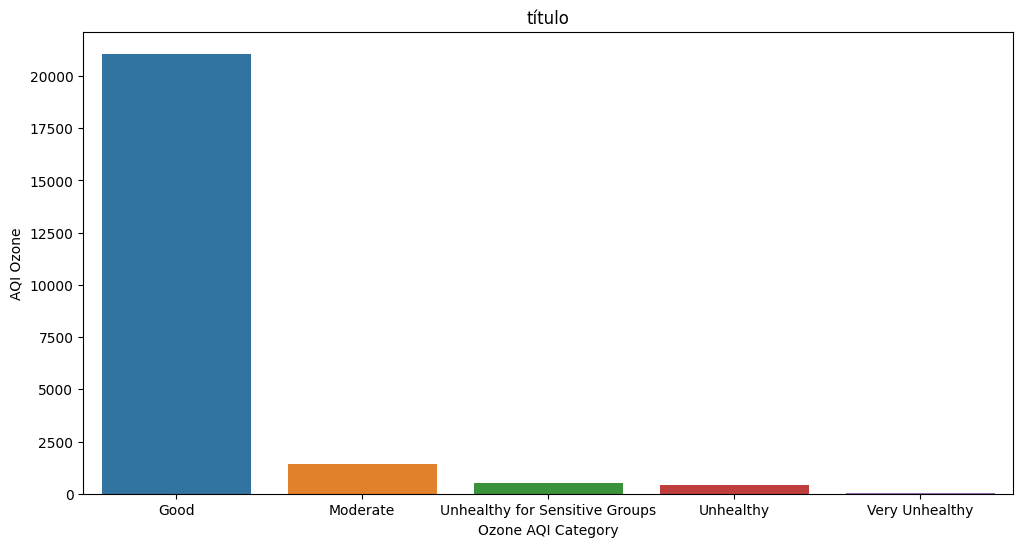

In [ ]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)

fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(x='Ozone AQI Category', data=QualidadeAR)
plt.title("título")
plt.ylabel("AQI Ozone")
plt.show();

In [ ]:
# Gráfico de setores da variável 'AQI Category'

px.pie(QualidadeAR,'Ozone AQI Category')

In [ ]:
# Box-plot com a distribuição da variável 'AQI Value'

boxAQI = px.box(QualidadeAR,y='Ozone AQI Value')
boxAQI.update_layout(width=700,height=400,title_text="AQI Ozônio")
boxAQI.show()

## 2.4 - *NO2*

In [ ]:
# Histograma com a distribuição da variável 'NO2 AQI Category'

histAQI = px.histogram(QualidadeAR, x='NO2 AQI Value', nbins=60)
histAQI.update_layout(width=700,height=400,title_text="AQI NO2")
histAQI.show()

In [ ]:
# Quantitativo das classificações da qualidade para 'NO2 AQI Category'

QualidadeAR['NO2 AQI Category'].value_counts()

Good        23448
Moderate       15
Name: NO2 AQI Category, dtype: int64

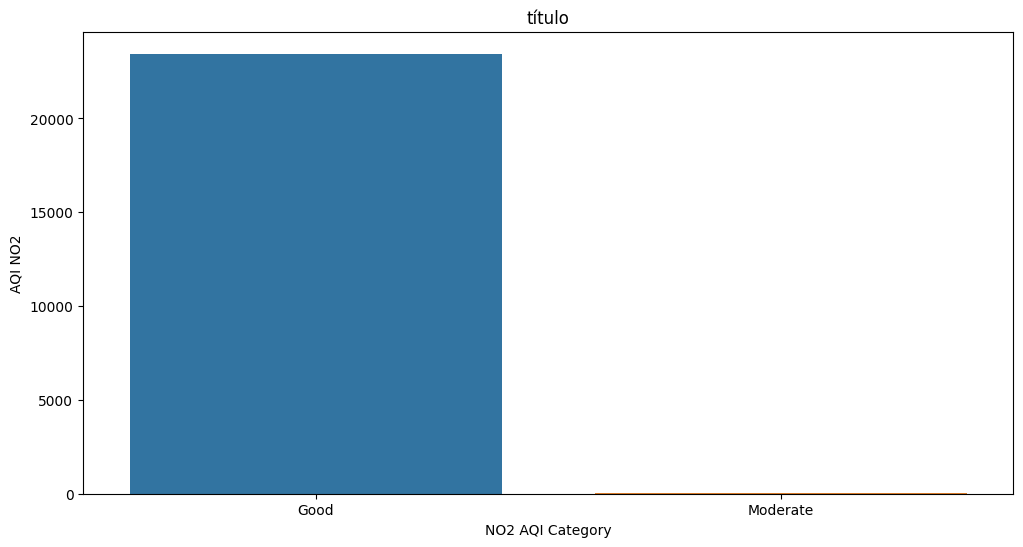

In [ ]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(x='NO2 AQI Category', data=QualidadeAR)
plt.title("título")
plt.ylabel("AQI NO2")
plt.show();

In [ ]:
# Box-plot com a distribuição da variável 'AQI Value'

boxAQI = px.box(QualidadeAR,y='NO2 AQI Value')
boxAQI.update_layout(width=700,height=400,title_text="AQI NO2")
boxAQI.show()

## 2.5 - *PM2.5*

In [ ]:
# Histograma com a distribuição da variável 'PM2.5 AQI Category'

histAQI = px.histogram(QualidadeAR, x='PM2.5 AQI Value', nbins=60)
histAQI.update_layout(width=700,height=400,title_text="AQI PM2.5")
histAQI.show()

In [ ]:
# Quantitativo das classificações da qualidade para 'PM2.5 AQI Category'

QualidadeAR['PM2.5 AQI Category'].value_counts()

Good                              10208
Moderate                           9075
Unhealthy                          2129
Unhealthy for Sensitive Groups     1624
Very Unhealthy                      255
Hazardous                           172
Name: PM2.5 AQI Category, dtype: int64

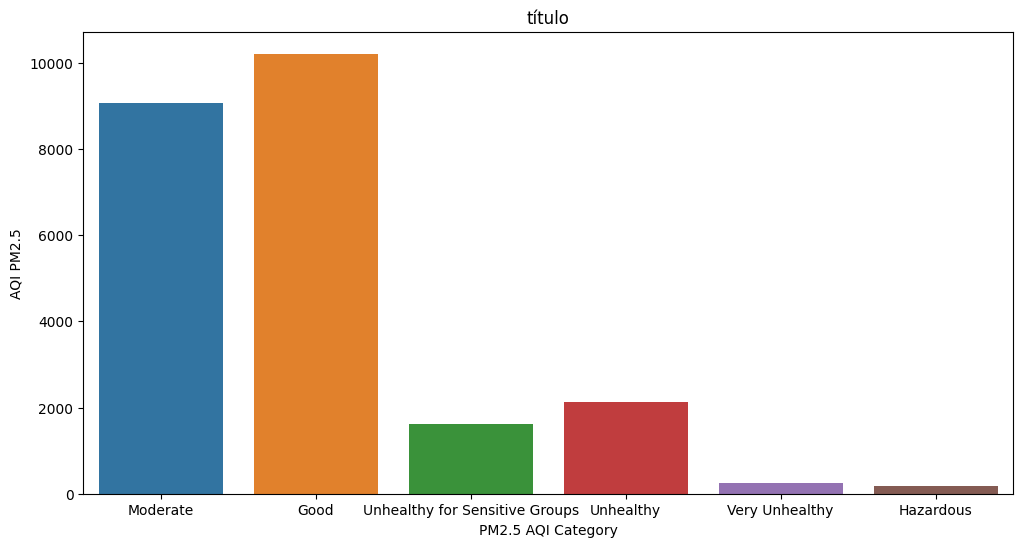

In [ ]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(x='PM2.5 AQI Category', data=QualidadeAR)
plt.title("título")
plt.ylabel("AQI PM2.5")
plt.show();

In [ ]:
# Gráfico de setores da variável 'PM2.5 AQI Category'

px.pie(QualidadeAR,'PM2.5 AQI Category')

In [ ]:
# Box-plot com a distribuição da variável 'AQI Value'

boxAQI = px.box(QualidadeAR,y='PM2.5 AQI Value')
boxAQI.update_layout(width=700,height=400,title_text="AQI PM2.5")
boxAQI.show()

# ***3 - Estatística Descritiva***

Como já visto anteriormente não existe variável com distribuição próxima da Normal, nenhuma delas a média e a mediana estão próximas.

In [ ]:
QualidadeAR.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


# ***4 - Pré-Processamento***

In [ ]:
# Criamos uma cópia do banco original QualidadeAR2

QualidadeAR2 = pd.DataFrame.copy(QualidadeAR)

Transformando as variáveis categóricas nominais em variávies categóricas ordinais

In [ ]:
QualidadeAR2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [ ]:
QualidadeAR2['AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

In [ ]:
QualidadeAR2['CO AQI Category'].unique()

array(['Good', 'Unhealthy for Sensitive Groups', 'Moderate'], dtype=object)

In [ ]:
QualidadeAR2['Ozone AQI Category'].unique()

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy'], dtype=object)

In [ ]:
QualidadeAR2['NO2 AQI Category'].unique()

array(['Good', 'Moderate'], dtype=object)

In [ ]:
QualidadeAR2['PM2.5 AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

In [ ]:
# Mudando as classificações do formato de string para numérico utilizando dicionário

QualidadeAR2['AQI Category'].replace({'Good':1, 'Moderate':2,'Unhealthy':3, 'Very Unhealthy' :4,  'Hazardous' :5, 'Unhealthy for Sensitive Groups' :6}, inplace = True)
QualidadeAR2['CO AQI Category'].replace({'Good':1, 'Moderate':2,'Unhealthy':3, 'Very Unhealthy' :4,  'Hazardous' :5, 'Unhealthy for Sensitive Groups' :6}, inplace = True)
QualidadeAR2['Ozone AQI Category'].replace({'Good':1, 'Moderate':2,'Unhealthy':3, 'Very Unhealthy' :4,  'Hazardous' :5, 'Unhealthy for Sensitive Groups' :6}, inplace = True)
QualidadeAR2['NO2 AQI Category'].replace({'Good':1, 'Moderate':2,'Unhealthy':3, 'Very Unhealthy' :4,  'Hazardous' :5, 'Unhealthy for Sensitive Groups' :6}, inplace = True)
QualidadeAR2['PM2.5 AQI Category'].replace({'Good':1, 'Moderate':2,'Unhealthy':3, 'Very Unhealthy' :4,  'Hazardous' :5, 'Unhealthy for Sensitive Groups' :6}, inplace = True)

In [ ]:
QualidadeAR2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  int64 
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  int64 
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  int64 
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  int64 
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 2.1+ MB


In [ ]:
# Mostrando os 5 primeiros registros

QualidadeAR2.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,2,1,1,36,1,0,1,51,2
1,Brazil,Presidente Dutra,41,1,1,1,5,1,1,1,41,1
2,Italy,Priolo Gargallo,66,2,1,1,39,1,2,1,66,2
3,Poland,Przasnysz,34,1,1,1,34,1,0,1,20,1
4,France,Punaauia,22,1,0,1,22,1,0,1,6,1


# ***5 - Atributos Previsores e Alvo***

In [ ]:
# Alterando a ordem das colunas do DataFrame QualidadeAR2

QualidadeAR2Previsores1  = QualidadeAR2[['CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category', 'AQI Category']]

In [ ]:
QualidadeAR2Previsores1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   CO AQI Category     23463 non-null  int64
 1   Ozone AQI Category  23463 non-null  int64
 2   NO2 AQI Category    23463 non-null  int64
 3   PM2.5 AQI Category  23463 non-null  int64
 4   AQI Category        23463 non-null  int64
dtypes: int64(5)
memory usage: 916.6 KB


In [ ]:
QualidadeAR2Previsores1

,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category,AQI Category
0,1,1,1,2,2
1,1,1,1,1,1
2,1,1,1,2,2
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
23458,1,3,1,3,3
23459,1,1,1,1,1
23460,1,1,1,1,1
23461,1,1,1,2,2


In [ ]:
QualidadeAR2Previsores1.describe()

,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category,AQI Category
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,1.000298,1.207518,1.000639,1.976260,1.991561
std,0.033922,0.794411,0.025277,1.319929,1.313593
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,2.000000
75%,1.000000,1.000000,1.000000,2.000000,2.000000
max,6.000000,6.000000,2.000000,6.000000,6.000000


## 5.1 - *Escalonamento*

In [ ]:
# Padronizando os dados do banco QualidadeAR2Previsores

QualidadeAR2PrevPAD = StandardScaler().fit_transform(QualidadeAR2Previsores1)

In [ ]:
QualidadeAR2PrevPAD

array([[-0.00879511, -0.26122842, -0.02529256,  0.01798583,  0.00642436],
       [-0.00879511, -0.26122842, -0.02529256, -0.73964696, -0.75486243],
       [-0.00879511, -0.26122842, -0.02529256,  0.01798583,  0.00642436],
       ...,
       [-0.00879511, -0.26122842, -0.02529256, -0.73964696, -0.75486243],
       [-0.00879511, -0.26122842, -0.02529256,  0.01798583,  0.00642436],
       [-0.00879511, -0.26122842, -0.02529256,  0.01798583,  0.00642436]])

In [ ]:
QualidadeAR2Previsores1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   CO AQI Category     23463 non-null  int64
 1   Ozone AQI Category  23463 non-null  int64
 2   NO2 AQI Category    23463 non-null  int64
 3   PM2.5 AQI Category  23463 non-null  int64
 4   AQI Category        23463 non-null  int64
dtypes: int64(5)
memory usage: 916.6 KB


In [ ]:
# Selecionando as colunas de interesse para a Transformação do array em um DataFrame

colnames = ['CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category', 'AQI Category']

QualidadeAR2PrevPADRZ = pd.DataFrame(QualidadeAR2PrevPAD, columns = colnames)

In [ ]:
QualidadeAR2PrevPADRZ

,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category,AQI Category
0,-0.008795,-0.261228,-0.025293,0.017986,0.006424
1,-0.008795,-0.261228,-0.025293,-0.739647,-0.754862
2,-0.008795,-0.261228,-0.025293,0.017986,0.006424
3,-0.008795,-0.261228,-0.025293,-0.739647,-0.754862
4,-0.008795,-0.261228,-0.025293,-0.739647,-0.754862
...,...,...,...,...,...
23458,-0.008795,2.256415,-0.025293,0.775619,0.767711
23459,-0.008795,-0.261228,-0.025293,-0.739647,-0.754862
23460,-0.008795,-0.261228,-0.025293,-0.739647,-0.754862
23461,-0.008795,-0.261228,-0.025293,0.017986,0.006424


In [ ]:
QualidadeAR2PrevPADRZ.describe()

,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category,AQI Category
count,2.346300e+04,2.346300e+04,2.346300e+04,2.346300e+04,2.346300e+04
mean,-2.736421e-15,-7.934288e-17,2.158611e-15,-1.175001e-16,-1.314306e-16
std,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00
min,-8.795108e-03,-2.612284e-01,-2.529256e-02,-7.396470e-01,-7.548624e-01
25%,-8.795108e-03,-2.612284e-01,-2.529256e-02,-7.396470e-01,-7.548624e-01
50%,-8.795108e-03,-2.612284e-01,-2.529256e-02,1.798583e-02,6.424361e-03
75%,-8.795108e-03,-2.612284e-01,-2.529256e-02,1.798583e-02,6.424361e-03
max,1.473909e+02,6.032880e+00,3.953732e+01,3.048517e+00,3.051572e+00


# ***6 - Modelagem* obs:onde está dando erro***

Modelagem usando os dados sem padronização

In [99]:
QualidadeAR2Previsores1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   CO AQI Category     23463 non-null  int64
 1   Ozone AQI Category  23463 non-null  int64
 2   NO2 AQI Category    23463 non-null  int64
 3   PM2.5 AQI Category  23463 non-null  int64
 4   AQI Category        23463 non-null  int64
dtypes: int64(5)
memory usage: 916.6 KB


In [96]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = QualidadeAR2Previsores1.values
X = array[:,0:4] # atributos
y = array[:,4] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

KNN: 0.999041 (0.000621)
CART: 0.998988 (0.000732)
NB: 0.869526 (0.008970)
SVM: 0.998988 (0.000556)


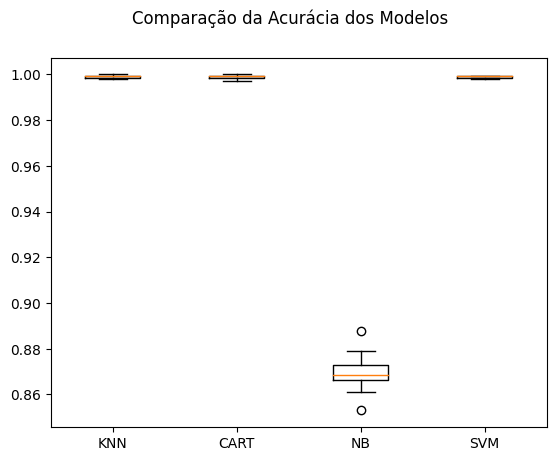

In [97]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Modelagem usando os dados padronizados

In [98]:
QualidadeAR2PrevPADRZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CO AQI Category     23463 non-null  float64
 1   Ozone AQI Category  23463 non-null  float64
 2   NO2 AQI Category    23463 non-null  float64
 3   PM2.5 AQI Category  23463 non-null  float64
 4   AQI Category        23463 non-null  float64
dtypes: float64(5)
memory usage: 916.6 KB


In [ ]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = QualidadeAR2PrevPADRZ.values
X = array[:,0:4] # atributos
y = array[:,4] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

ValueError: ignored

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.87662476028127
